In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load all sheets
excel_file = 'C:/Users/siyal/Downloads/Hospital Health Care Management Data set.xlsx'
detail_data = pd.read_excel(excel_file, sheet_name='Detail data dataset')
staff_table = pd.read_excel(excel_file, sheet_name='Staff_Detail')
department_table = pd.read_excel(excel_file, sheet_name='Department')
bed_detail = pd.read_excel(excel_file, sheet_name='Bed_Detail')

# Display the first few rows of each table
print(detail_data.head())
print(staff_table.head())
print(department_table.head())
print(bed_detail.head())

# Merge datasets
merged_data = detail_data.merge(staff_table, on='Staff_Id', how='left')
merged_data = merged_data.merge(department_table, on='Dpt_ID', how='left')
merged_data = merged_data.merge(bed_detail, on='Bed_ID', how='left')

# Display merged data info and check for missing values
print(merged_data.head())

   Staff_Id Bed_ID  Dpt_ID   ID             Name Gender         City  \
0     30016  Bed_1     108  278  Allen, Savannah      F       oxford   
1     30032  Bed_2     108  294   Alonso, Arthur      M  Chula Vista   
2     30040  Bed_3     108  302   Alonso, Carrie      F    Royal Oak   
3     30046  Bed_4     108  308    Alonso, Danny      M    Royal Oak   
4     30052  Bed_5     108  314    Alonso, Diane      F    Royal Oak   

             State  Age Patient type  ...           Bed  LOS ER_Time  \
0       California    7   outpatient  ...  Not Occupied    0    23.0   
1          England   43   outpatient  ...  Not Occupied    0    30.0   
2    Seine (Paris)    2   outpatient  ...  Not Occupied    0    36.0   
3       Queensland    8   outpatient  ...  Not Occupied    0    50.0   
4  New South Wales   14   outpatient  ...  Not Occupied    0    48.0   

        Date     Feedback Rating Age Bucket  Custom    FZ me  \
0 2007-10-16  Fully Agree    5.0      6-20Y    Null  Postive   
1 2007

In [3]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Staff_Id         2506 non-null   int64         
 1   Bed_ID           2506 non-null   object        
 2   Dpt_ID           2506 non-null   int64         
 3   ID               2506 non-null   int64         
 4   Name             2506 non-null   object        
 5   Gender           2506 non-null   object        
 6   City             2506 non-null   object        
 7   State            2506 non-null   object        
 8   Age              2506 non-null   int64         
 9   Patient type     2506 non-null   object        
 10  Status           2506 non-null   object        
 11  Treatment Cost   2506 non-null   float64       
 12  Bed              2506 non-null   object        
 13  LOS              2506 non-null   int64         
 14  ER_Time          1787 non-null   float64

In [3]:
print(merged_data.describe())

           Staff_Id       Dpt_ID           ID          Age  Treatment Cost  \
count   2506.000000  2506.000000  2506.000000  2506.000000     2506.000000   
mean   30128.133679   107.322825  1255.103352    30.497207     2215.269503   
min    30001.000000   101.000000     1.000000     1.000000        8.160000   
25%    30063.000000   107.000000   628.250000    18.000000      118.674000   
50%    30126.000000   108.000000  1254.500000    21.000000      322.982500   
75%    30193.000000   109.000000  1880.750000    52.000000     1114.460275   
max    30262.000000   110.000000  4126.000000    98.000000   701000.000000   
std       75.319520     2.244695   725.474113    20.867843    16716.086487   

               LOS      ER_Time                           Date       Rating  
count  2506.000000  1787.000000                           2506  2506.000000  
mean      1.697127    65.631226  2007-05-18 03:52:08.810853888     4.985860  
min       0.000000    11.000000            2007-01-01 00:00:00 

In [4]:
print(merged_data.isnull().sum())

Staff_Id             0
Bed_ID               0
Dpt_ID               0
ID                   0
Name                 0
Gender               0
City                 0
State                0
Age                  0
Patient type         0
Status               0
Treatment Cost       0
Bed                  0
LOS                  0
ER_Time            719
Date                 0
Feedback             0
Rating               0
Age Bucket           0
Custom               0
FZ me                0
Illness_Type         0
Staff Name           0
Department_Name      0
Bed Number         755
dtype: int64


In [5]:
print(merged_data.drop_duplicates())

      Staff_Id Bed_ID  Dpt_ID    ID              Name Gender         City  \
0        30016  Bed_1     108   278   Allen, Savannah      F       oxford   
1        30032  Bed_2     108   294    Alonso, Arthur      M  Chula Vista   
2        30040  Bed_3     108   302    Alonso, Carrie      F    Royal Oak   
3        30046  Bed_4     108   308     Alonso, Danny      M    Royal Oak   
4        30052  Bed_5     108   314     Alonso, Diane      F    Royal Oak   
...        ...    ...     ...   ...               ...    ...          ...   
2501     30219  21735     109  2053  Carlson, Armando      M    Cliffside   
2502     30220  21736     109  2054   Carlson, Arthur      M    Cliffside   
2503     30223  21739     109  2057    Carlson, Billy      M    Cliffside   
2504     30226  21742     109  2060    Carlson, Bruce      M    Cliffside   
2505     30227  21743     109  2061    Carlson, Byron      M    Cliffside   

                 State  Age Patient type  ...       Date     Feedback Ratin

In [4]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

In [5]:
print(merged_data['Date'])

0      2007-10-16
1      2007-11-01
2      2007-11-09
3      2007-11-15
4      2007-11-21
          ...    
2501   2007-03-16
2502   2007-05-20
2503   2007-01-24
2504   2007-04-16
2505   2007-12-25
Name: Date, Length: 2506, dtype: datetime64[ns]


In [6]:
import pandas as pd
import numpy as np

# Sample DataFrame (replace with your actual data)
merged_data = {'Age': [18, 25, 42, 65, 12, 30, 55, 70, 28, 48]}
merged_data = pd.DataFrame(merged_data)  # Create a DataFrame from the dictionary

# Define age bins
bins = [0, 18, 35, 50, np.inf]  # np.inf represents infinity for the last bin
labels = ['0-18', '19-35', '36-50', '50+']

# Create the Age_Group column using pd.cut()
merged_data['Age_Group'] = pd.cut(merged_data['Age'], bins=bins, labels=labels)

print(merged_data)

   Age Age_Group
0   18      0-18
1   25     19-35
2   42     36-50
3   65       50+
4   12      0-18
5   30     19-35
6   55       50+
7   70       50+
8   28     19-35
9   48     36-50


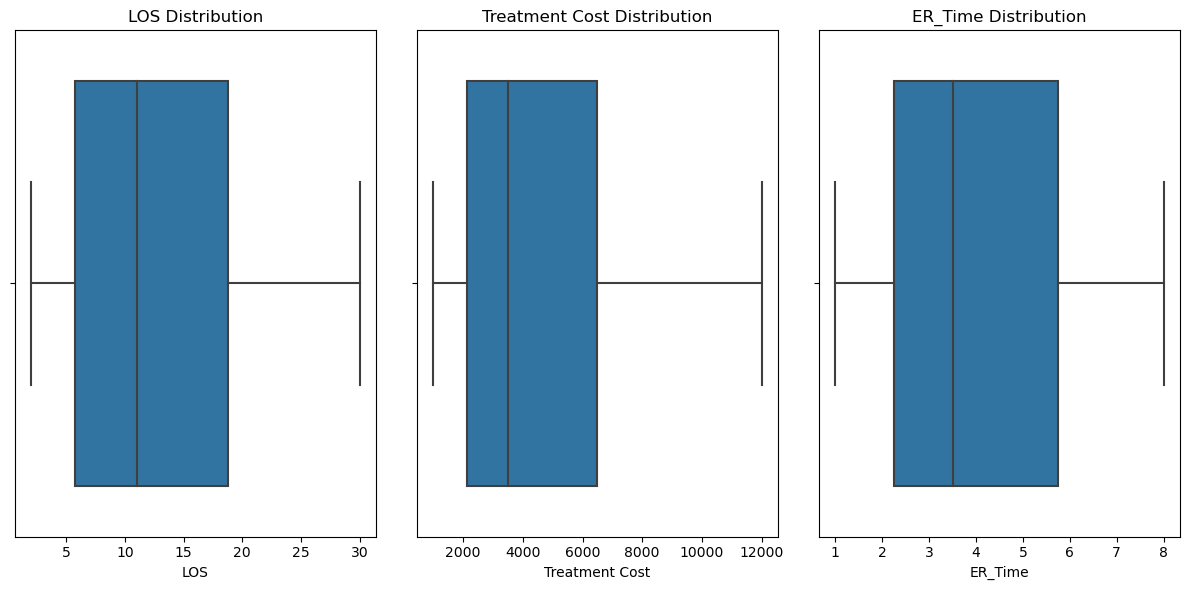

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame with required columns
merged_data = pd.DataFrame({
    'Age': [18, 25, 42, 65, 12, 30, 55, 70, 28, 48],
    'LOS': [5, 10, 3, 15, 2, 20, 25, 30, 8, 12],
    'Treatment Cost': [1000, 5000, 2000, 7000, 1500, 3000, 10000, 12000, 4000, 2500],
    'ER_Time': [2, 5, 3, 8, 1, 6, 4, 7, 2, 3]
})

# Define valid ranges
valid_los_range = (0, 100)
valid_treatment_cost_range = (0, 120000)
valid_er_time_range = (0, 24)

# Filter data based on ranges
merged_data = merged_data[
    (merged_data['LOS'] >= valid_los_range[0]) & 
    (merged_data['LOS'] <= valid_los_range[1])
]
merged_data = merged_data[
    (merged_data['Treatment Cost'] >= valid_treatment_cost_range[0]) & 
    (merged_data['Treatment Cost'] <= valid_treatment_cost_range[1])
]
merged_data = merged_data[
    (merged_data['ER_Time'] >= valid_er_time_range[0]) & 
    (merged_data['ER_Time'] <= valid_er_time_range[1])
]

# Visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x=merged_data['LOS'])
plt.title('LOS Distribution')

plt.subplot(1, 3, 2)
sns.boxplot(x=merged_data['Treatment Cost'])
plt.title('Treatment Cost Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(x=merged_data['ER_Time'])
plt.title('ER_Time Distribution')
plt.tight_layout()
plt.show()

Perform Statistical Analysis

In [8]:
import pandas as pd

# Sample dataset (replace this with your actual data)
data = pd.DataFrame({
    'Illness_Type': ['Type1', 'Type2', 'Type1', 'Type3', 'Type2', 'Type3', 'Type1', 'Type2'],
    'Patient_Type': ['Inpatient', 'Outpatient', 'Inpatient', 'Inpatient', 'Outpatient', 'Inpatient', 'Outpatient', 'Outpatient'],
    'Dpt_ID': [1, 2, 1, 3, 2, 3, 1, 2],
    'LOS': [5, 10, 15, 20, 25, 30, 35, 40]
})

In [9]:
# Group by Illness_Type, Patient_Type, and Dpt_ID
avg_los = data.groupby(['Illness_Type', 'Patient_Type', 'Dpt_ID'])['LOS'].mean().reset_index()

# Rename the column for clarity
avg_los.rename(columns={'LOS': 'Average_LOS'}, inplace=True)

print(avg_los)

  Illness_Type Patient_Type  Dpt_ID  Average_LOS
0        Type1    Inpatient       1         10.0
1        Type1   Outpatient       1         35.0
2        Type2   Outpatient       2         25.0
3        Type3    Inpatient       3         25.0


In [10]:
# Pivot for department comparison
pivot_data = avg_los.pivot_table(
    index=['Illness_Type', 'Patient_Type'], 
    columns='Dpt_ID', 
    values='Average_LOS'
).fillna(0)

print(pivot_data)

Dpt_ID                        1     2     3
Illness_Type Patient_Type                  
Type1        Inpatient     10.0   0.0   0.0
             Outpatient    35.0   0.0   0.0
Type2        Outpatient     0.0  25.0   0.0
Type3        Inpatient      0.0   0.0  25.0


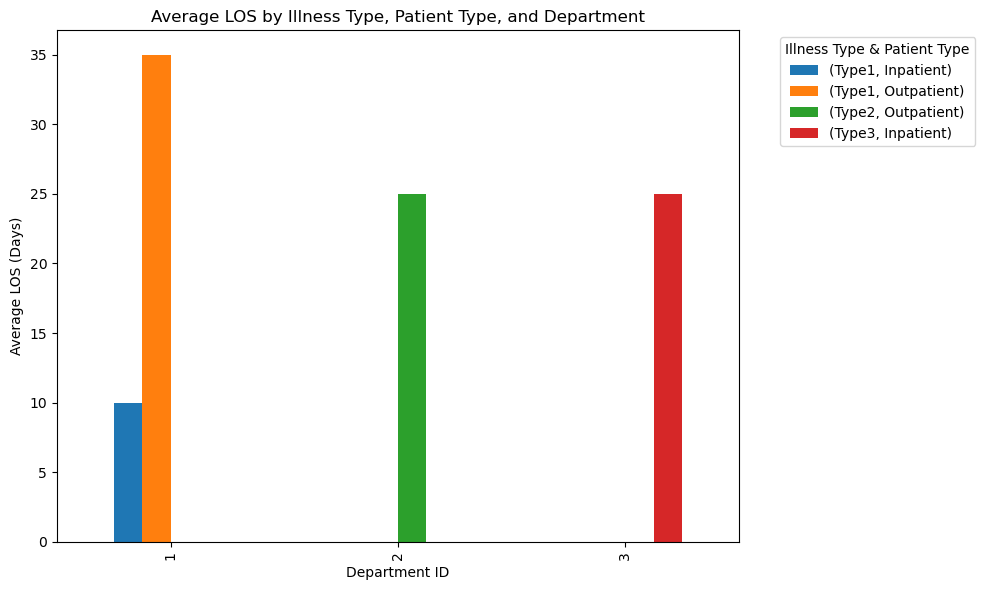

In [11]:
import matplotlib.pyplot as plt

# Visualize average LOS comparison
avg_los.pivot(index='Dpt_ID', columns=['Illness_Type', 'Patient_Type'], values='Average_LOS').plot(kind='bar', figsize=(10, 6))
plt.title('Average LOS by Illness Type, Patient Type, and Department')
plt.ylabel('Average LOS (Days)')
plt.xlabel('Department ID')
plt.legend(title='Illness Type & Patient Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset (replace this with your actual data)
data = pd.DataFrame({
    'Age': [18, 25, 42, 65, 12, 30, 55, 70, 28, 48],
    'Treatment Cost': [1000, 2000, 1500, 3000, 800, 2500, 4000, 3500, 1800, 2200]
})

# Define age bins
bins = [0, 18, 35, 50, np.inf]  # np.inf represents infinity for the last bin
labels = ['0-18', '19-35', '36-50', '50+']

# Create the Age_Group column
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

print(data)

   Age  Treatment Cost Age_Group
0   18            1000      0-18
1   25            2000     19-35
2   42            1500     36-50
3   65            3000       50+
4   12             800      0-18
5   30            2500     19-35
6   55            4000       50+
7   70            3500       50+
8   28            1800     19-35
9   48            2200     36-50


In [13]:
# Group data by Age_Group and calculate average and median treatment costs
cost_stats = data.groupby('Age_Group')['Treatment Cost'].agg(
    Average_Treatment_Cost='mean',
    Median_Treatment_Cost='median'
).reset_index()

print(cost_stats)

  Age_Group  Average_Treatment_Cost  Median_Treatment_Cost
0      0-18                   900.0                  900.0
1     19-35                  2100.0                 2000.0
2     36-50                  1850.0                 1850.0
3       50+                  3500.0                 3500.0


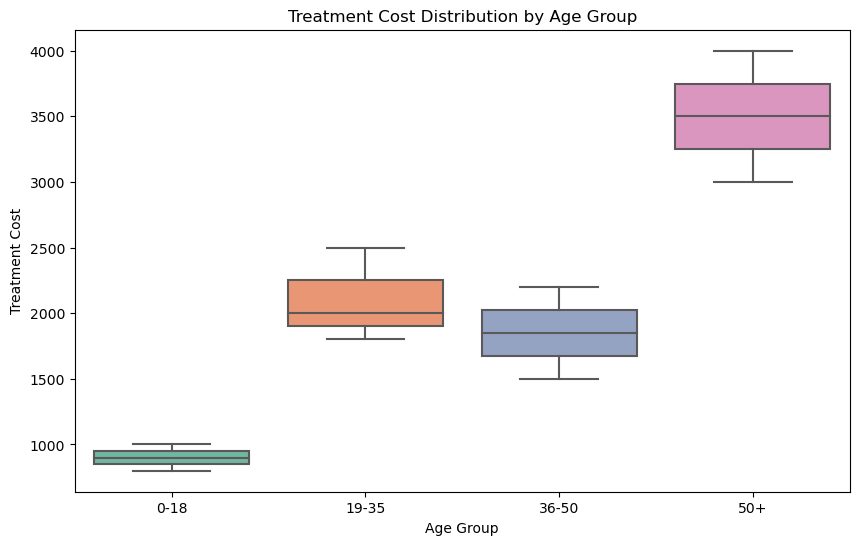

In [14]:
# Box plot for treatment cost distribution by Age_Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Treatment Cost', data=data, palette='Set2')

plt.title('Treatment Cost Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Treatment Cost')
plt.show()

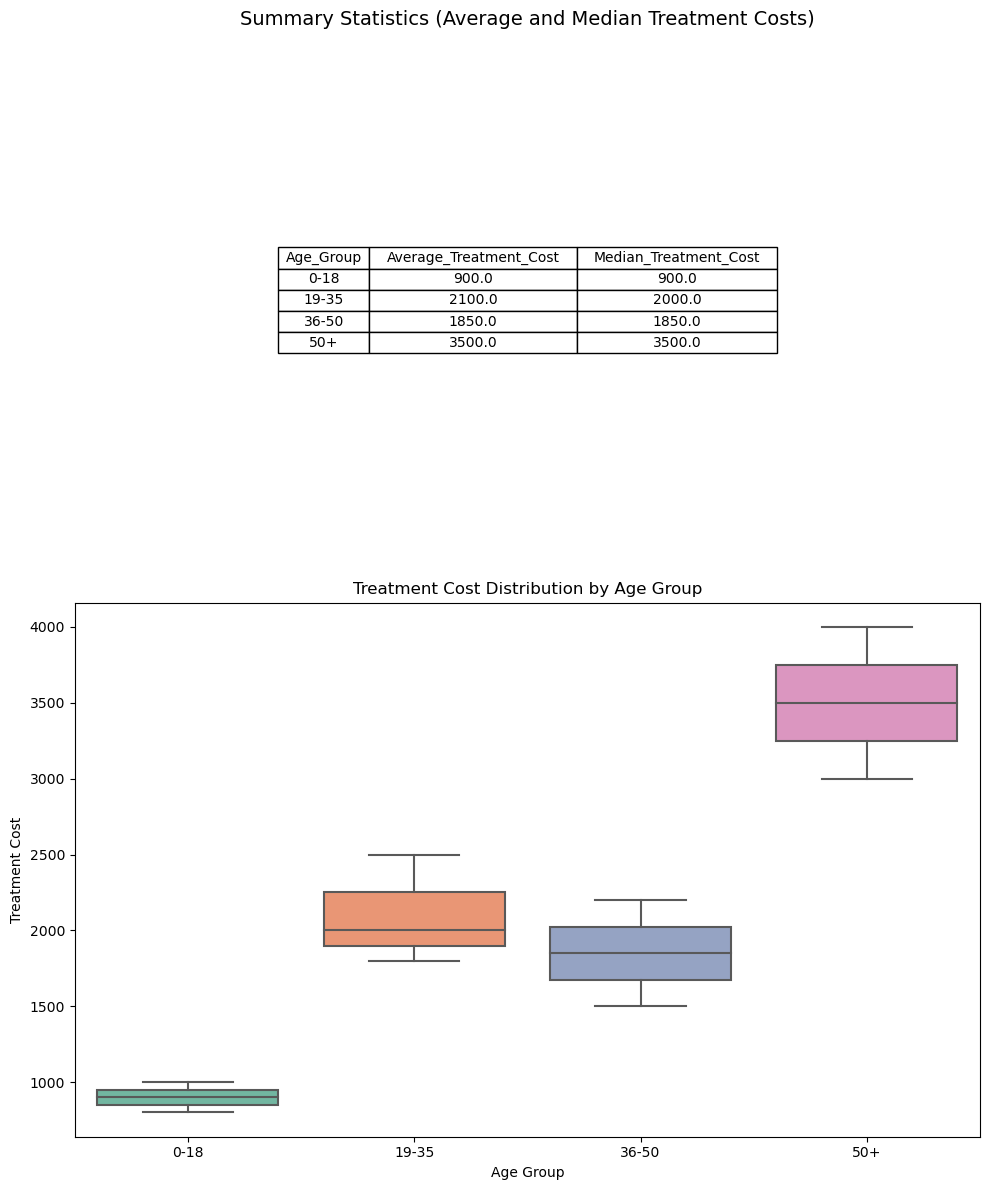

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Table for Average and Median Treatment Costs
axs[0].axis('off')
table_data = cost_stats.values
table_columns = cost_stats.columns
table = axs[0].table(cellText=table_data, colLabels=table_columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(table_columns))))
axs[0].set_title('Summary Statistics (Average and Median Treatment Costs)', fontsize=14)

# Boxplot for Treatment Cost Distribution
sns.boxplot(x='Age_Group', y='Treatment Cost', data=data, palette='Set2', ax=axs[1])
axs[1].set_title('Treatment Cost Distribution by Age Group')
axs[1].set_xlabel('Age Group')
axs[1].set_ylabel('Treatment Cost')

plt.tight_layout()
plt.show()

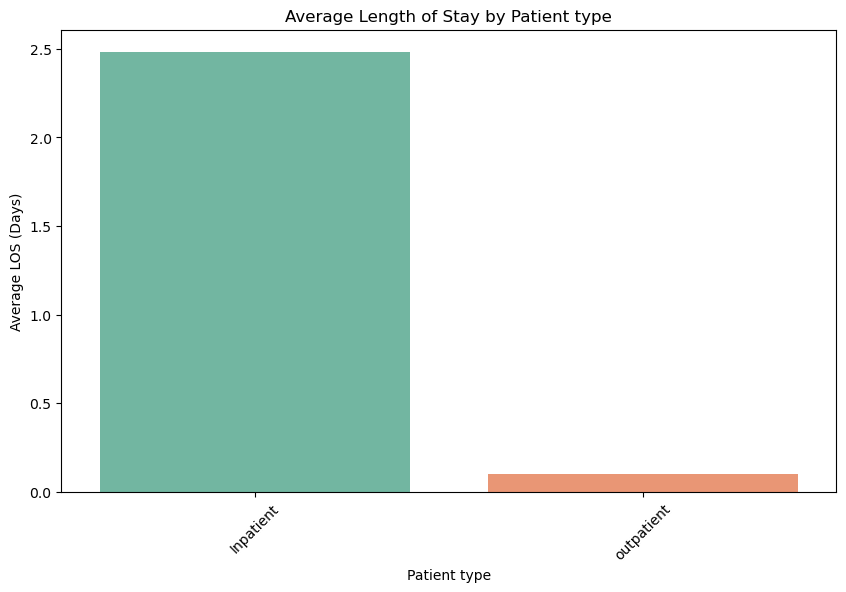

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
excel_file = 'C:/Users/siyal/Downloads/Hospital Health Care Management Data set.xlsx'
detail_data = pd.read_excel(excel_file, sheet_name='Detail data dataset')

# Check for columns and calculate average LOS (outside the if block)
if {'Patient type', 'LOS'}.issubset(detail_data.columns):
    avg_los_patient_type = detail_data.groupby('Patient type')['LOS'].mean().reset_index()
else:
    print("One or both of the columns ('Patient_Type' or 'LOS') are not found in the DataFrame.")
    # Exit the script if columns are missing to avoid errors in the plotting section
    exit()

# Bar Chart (use the defined variable now)
plt.figure(figsize=(10, 6))
sns.barplot(x='Patient type', y='LOS', data=avg_los_patient_type, palette='Set2')
plt.title('Average Length of Stay by Patient type')
plt.xlabel('Patient type')
plt.ylabel('Average LOS (Days)')
plt.xticks(rotation=45)
plt.show()

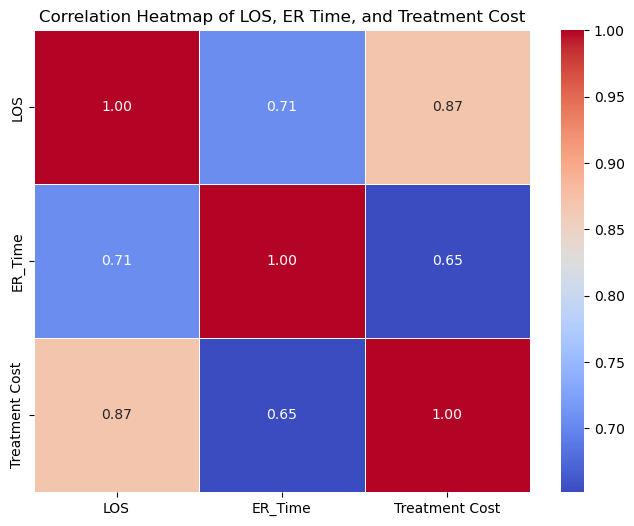

In [25]:
# Calculate correlation matrix
correlation_matrix = merged_data[['LOS', 'ER_Time', 'Treatment Cost']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of LOS, ER Time, and Treatment Cost')
plt.show()

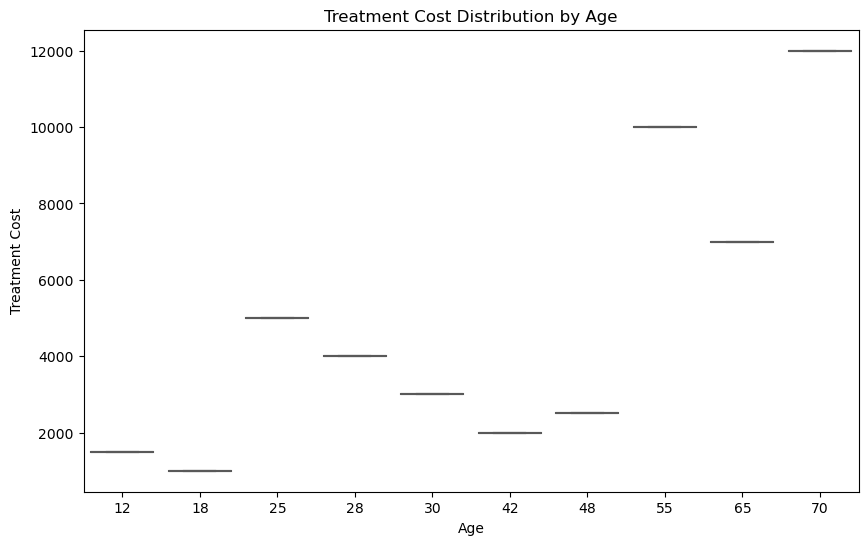

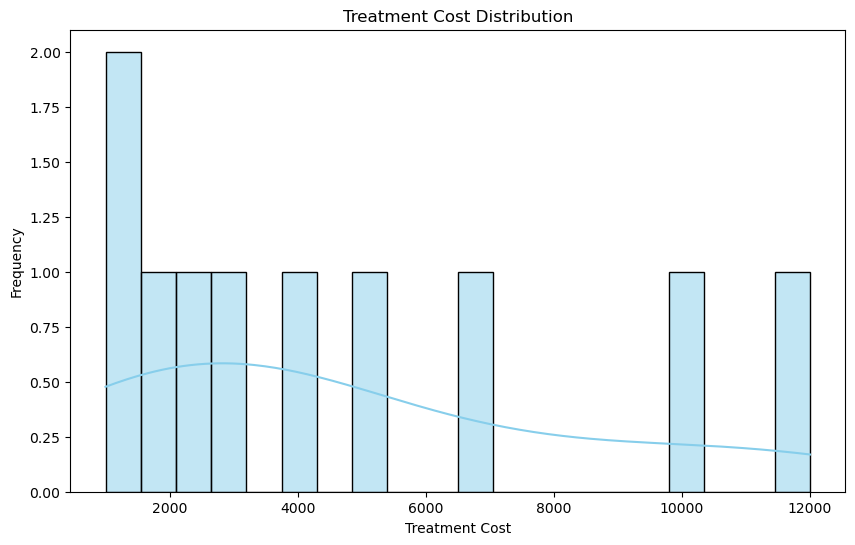

In [26]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Treatment Cost', data=merged_data, palette='Set2')
plt.title('Treatment Cost Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Treatment Cost')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Treatment Cost'], kde=True, bins=20, color='skyblue')
plt.title('Treatment Cost Distribution')
plt.xlabel('Treatment Cost')
plt.ylabel('Frequency')
plt.show()

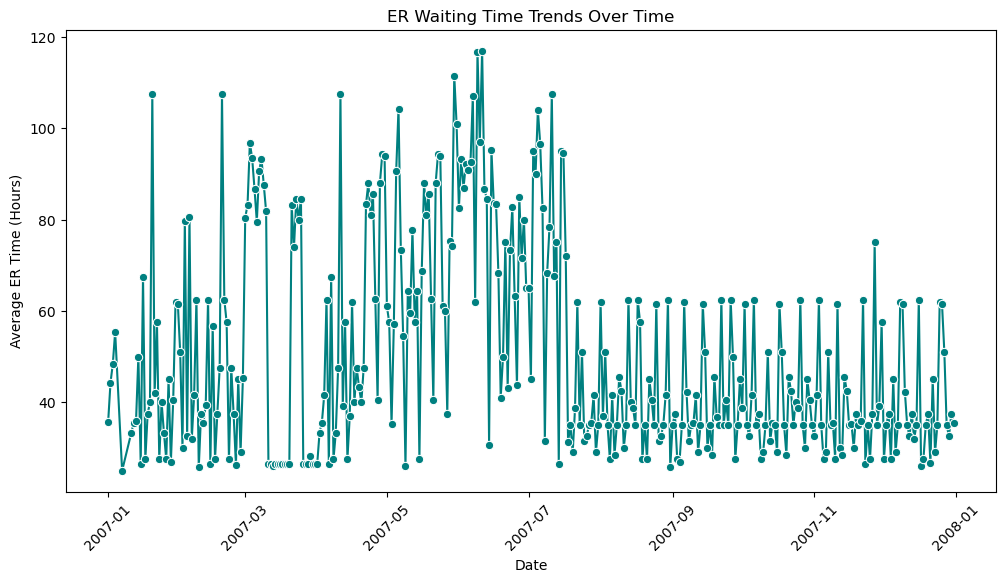

In [27]:
# Group by date to calculate average ER Time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
excel_file = 'C:/Users/siyal/Downloads/Hospital Health Care Management Data set.xlsx'
detail_data = pd.read_excel(excel_file, sheet_name='Detail data dataset')

# Check for columns and calculate average LOS (outside the if block)
if {'Date', 'ER_Time'}.issubset(detail_data.columns):
    avg_los_patient_type = detail_data.groupby('Date')['ER_Time'].mean().reset_index()
else:
    print("One or both of the columns ('Date' or 'ER_Time') are not found in the DataFrame.")
    # Exit the script if columns are missing to avoid errors in the plotting section
    exit()
er_time_trends = detail_data.groupby('Date')['ER_Time'].mean().reset_index()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ER_Time', data=er_time_trends, marker='o', color='teal')
plt.title('ER Waiting Time Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average ER Time (Hours)')
plt.xticks(rotation=45)
plt.show()

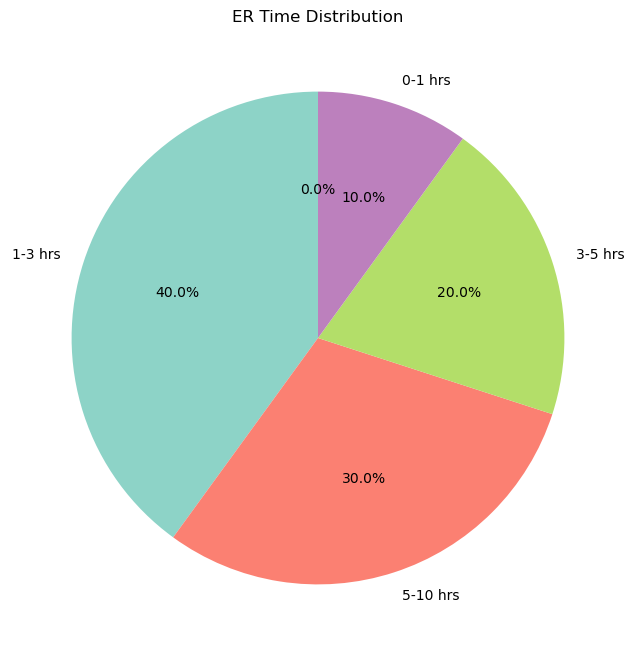

In [28]:
# Create bins for ER Time distribution
er_time_bins = pd.cut(merged_data['ER_Time'], bins=[0, 1, 3, 5, 10, np.inf], labels=["0-1 hrs", "1-3 hrs", "3-5 hrs", "5-10 hrs", "10+ hrs"])

# Pie Chart
er_time_dist = er_time_bins.value_counts()
plt.figure(figsize=(8, 8))
er_time_dist.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('ER Time Distribution')
plt.ylabel('')
plt.show()

In [29]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


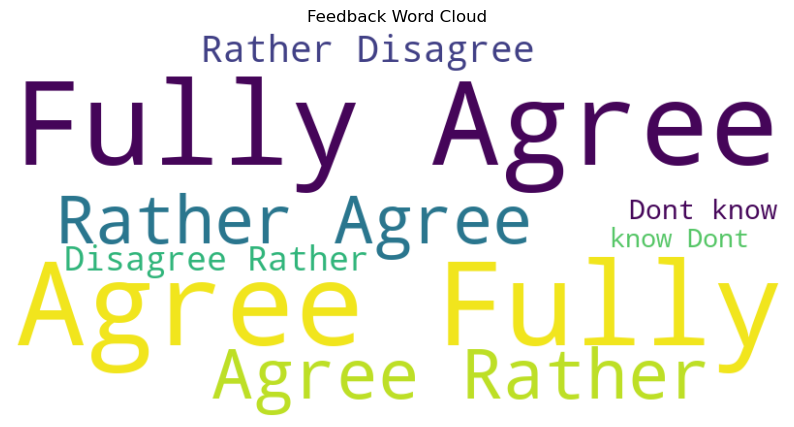

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your data
excel_file = 'C:/Users/siyal/Downloads/Hospital Health Care Management Data set.xlsx'
detail_data = pd.read_excel(excel_file, sheet_name='Detail data dataset')

# Check for columns (optional)
if not {'Feedback'}.issubset(detail_data.columns):
  print("The 'Feedback' column is not found in the DataFrame.")
  exit()

# Join all feedback text into a single string
all_feedback = ' '.join(detail_data['Feedback'].dropna())

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_feedback)

# Display Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Feedback Word Cloud')
plt.show()

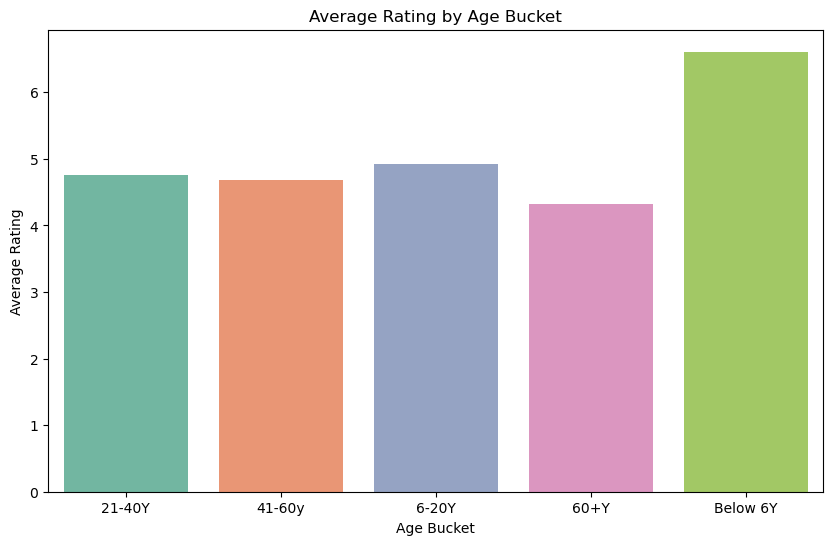

In [34]:
# Calculate average rating by Age Group or Patient Type
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
excel_file = 'C:/Users/siyal/Downloads/Hospital Health Care Management Data set.xlsx'
detail_data = pd.read_excel(excel_file, sheet_name='Detail data dataset')

# Check for columns and calculate average LOS (outside the if block)
if {'Age Bucket', 'Rating'}.issubset(detail_data.columns):
    avg_rating_age_group = detail_data.groupby('Age Bucket')['Rating'].mean().reset_index()
else:
    print("One or both of the columns ('Age Bucket' or 'Rating') are not found in the DataFrame.")
    # Exit the script if columns are missing to avoid errors in the plotting section
    exit()
avg_rating = detail_data.groupby('Age Bucket')['Rating'].mean().reset_index()

# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Bucket', y='Rating', data=avg_rating, palette='Set2')
plt.title('Average Rating by Age Bucket')
plt.xlabel('Age Bucket')
plt.ylabel('Average Rating')
plt.show()